/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


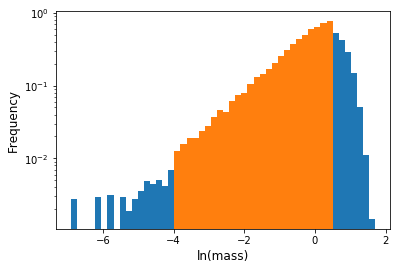

Alpha = 1.0044095746559465


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log


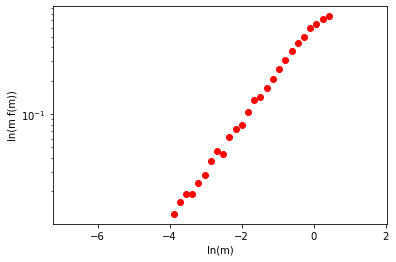

In [39]:
from astropy.io import ascii
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
import numpy as np

model = ascii.read('/home/yobd/Documents/galaxy_model.dat')
model.remove_rows([model['Mass'] == 0])

mass_array = model['Mass'][np.log(model['Mass']) > -4]
mass_array = mass_array[np.log(mass_array) < 0.5]

plt.figure(1)
n, bins, p = plt.hist(np.log(model['Mass']), 50, normed = 1)
plt.hist(np.log(mass_array), bins = bins, normed = 1, color = "C1")
plt.yscale('log')
plt.xlabel("ln(mass)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

bincount, bin_edge = np.histogram(np.log(mass_array), bins, normed = 1)

bincenter = (bin_edge[1:] + bin_edge[:-1]) / 2.0

xdata = bincenter[:]
ydata = bincount[:]

def linear_function(x, k):
    return k * x

fitParams, fitCov = curve_fit(linear_function, bincenter, bincount)

print("Alpha =", -(fitParams[0] - 1))

x = np.linspace(np.amin(bincenter), np.amax(bincenter), len(bincenter))

plt.figure(2)
plt.plot(xdata, ydata, 'ro')
plt.plot(np.log(x), np.log(linear_function(x, *fitParams)))
plt.xlabel("ln(m)")
plt.ylabel("ln(m f(m))")
plt.yscale('log')
plt.show()

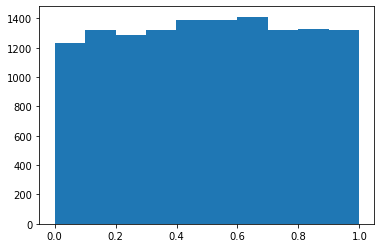

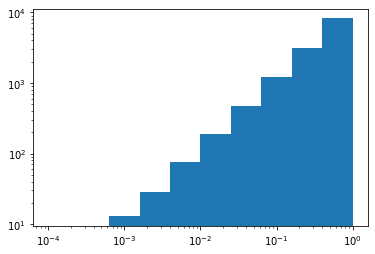

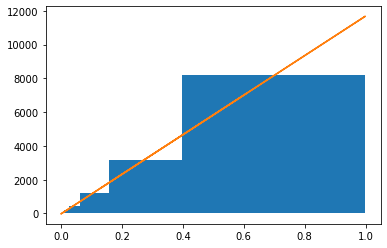

[4.06860865        nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10


In [55]:
### Tried measuring the slope between two slopes as done in SONYC VII ###

from astropy.io import ascii
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
import numpy as np

def powerlaw(x, m, b):
    return x*m + b

def plot_loghist(x, bins):
    plt.figure(1)
    hist, bins, _ = plt.hist(x, bins = bins)
    plt.show()
    logbins = np.logspace(np.log10(0.0001), np.log10(bins[-1]), len(bins))
    plt.figure(2)
    n, bins, _ = plt.hist(x, bins = logbins)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
    bin_centers = bins[:-1] + np.diff(bins) / 2
    
    popt, _ = curve_fit(powerlaw, bin_centers, n)
    
    plt.figure(2)
    plt.hist(x, bins = logbins)
    plt.plot(x, powerlaw(x, *popt))
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()
    print(np.log10(popt))

model = ascii.read('/home/yobd/Documents/galaxy_model.dat')

model = model[model['Mass'] < 1]

plot_loghist(model['Mass'], 10)

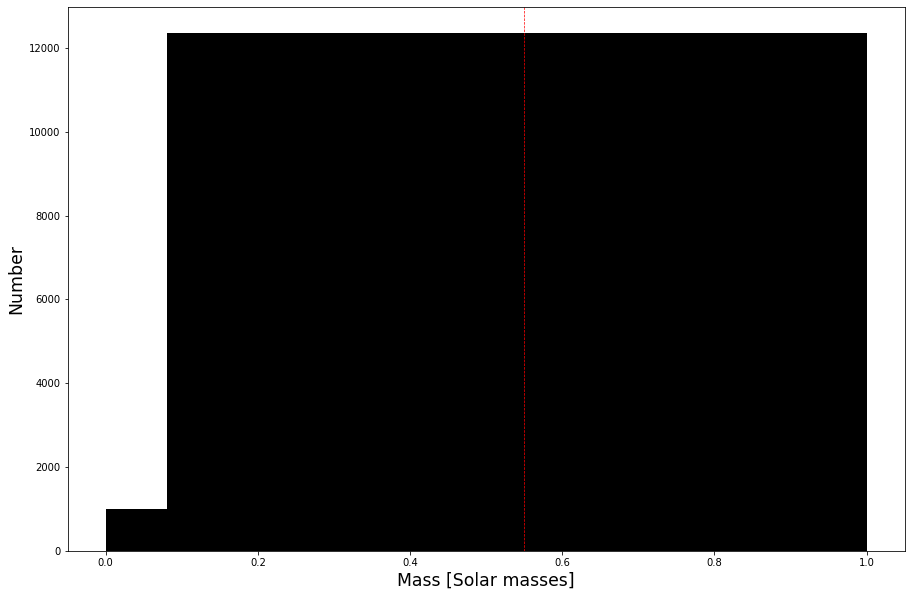

[0.04   0.5405] [  992. 12356.]
[22705.29470529    83.78821179]


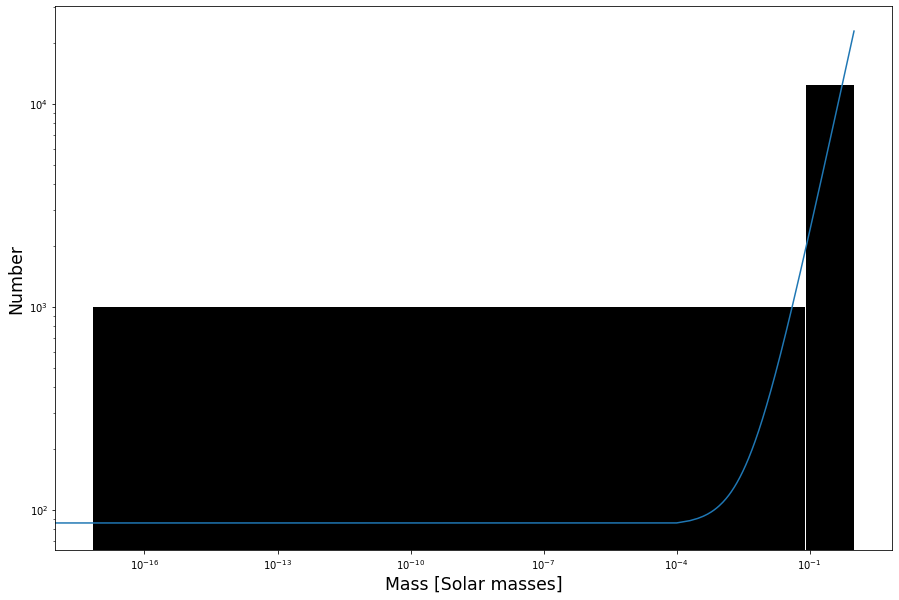

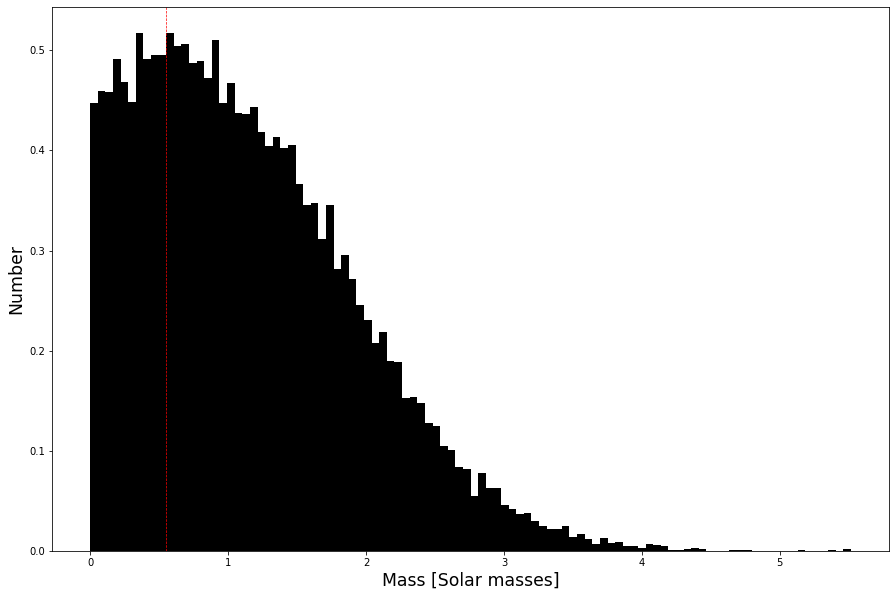

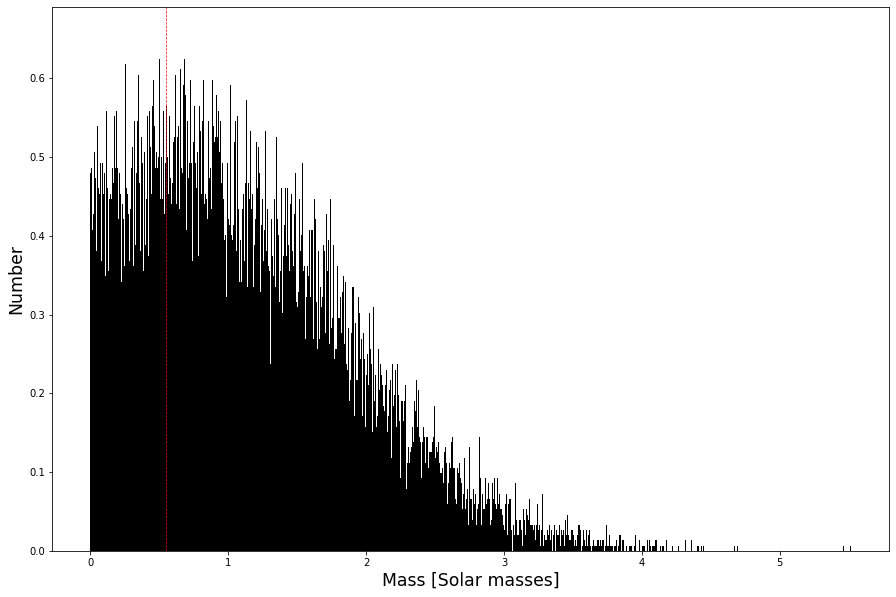

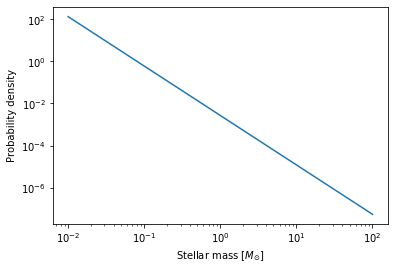

In [22]:
from astropy.io import ascii
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
import numpy as np

class PowerLawPDF(object):
    def __init__(self, gamma, B=1.):
        self.gamma = gamma
        self.B = B
    def __call__(self, x):
        return x**self.gamma / self.B

model = ascii.read('/home/yobd/Documents/galaxy_model.dat')

high_mass = model[model['Mass'] > 0.08]
high_mass = high_mass[high_mass['Mass'] <= 1]

low_mass = model[model['Mass'] <= 0.08]

#my_grid = np.linspace(np.amin(model['Mass']), np.amax(model['Mass']), 10)

#x = np.linspace(powerlaw.ppf(np.amin(model['Mass']), -2.35), powerlaw.ppf(np.amax(model['Mass']), -2.35), 10)

plt.figure(1, figsize = (15, 10))
#n_all, bins, patches = plt.hist(model['Mass'], bins = 10, histtype = 'barstacked', color = 'black', label = 'All Sources', density = True)
n_low, bins_low, patches_low = plt.hist(low_mass['Mass'], bins = 1, histtype = 'barstacked', color = 'black', label = 'Low-mass', density = False)
n_high, bins_high, patches_high = plt.hist(high_mass['Mass'], bins = 1, histtype = 'barstacked', color = 'black', label = 'High-mass', density = False)
plt.axvline(x = 0.55, color = 'r', linestyle = '--', linewidth = 0.7)
plt.xlabel("Mass [Solar masses]", fontsize = 'xx-large')
plt.ylabel("Number", fontsize = 'xx-large')
#plt.legend(fontsize = 30, loc = 2)
plt.show()

bin_center_low = bins_low[:-1] + np.diff(bins_low) / 2
bin_center_high = bins_high[:-1] + np.diff(bins_high) / 2
bin_center = bin_center_low
bin_center = np.append(bin_center, bin_center_high)
n = n_low
n = np.append(n, n_high)
print(bin_center, n)
def powerlaw(x, m, b):
    return x*m + b

popt, _ = curve_fit(powerlaw, bin_center, n)
print(popt)
x = np.linspace(bins_low[0], bins_high[-1], 10000)

plt.figure(2, figsize = (15, 10))
#n_all, bins, patches = plt.hist(model['Mass'], bins = 10, histtype = 'barstacked', color = 'black', label = 'All Sources', density = True)
n_low, bins_low, patches_low = plt.hist(low_mass['Mass'], bins = 1, histtype = 'barstacked', color = 'black', label = 'Low-mass', density = False)
n_high, bins_high, patches_high = plt.hist(high_mass['Mass'], bins = 1, histtype = 'barstacked', color = 'black', label = 'High-mass', density = False)
plt.xscale('log')
plt.yscale('log')
plt.loglog(x, powerlaw(x, *popt))
#plt.loglog(bin_center, n)
plt.xlabel("Mass [Solar masses]", fontsize = 'xx-large')
plt.ylabel("Number", fontsize = 'xx-large')
#plt.legend(fontsize = 30, loc = 2)
plt.show()

plt.figure(3, figsize = (15, 10))
n_all, bins, patches = plt.hist(model['Mass'], bins = 100, histtype = 'barstacked', color = 'black', label = 'All Sources', density = True)
plt.axvline(x = 0.55, color = 'r', linestyle = '--', linewidth = 0.7)
plt.xlabel("Mass [Solar masses]", fontsize = 'xx-large')
plt.ylabel("Number", fontsize = 'xx-large')
#plt.legend(fontsize = 30, loc = 2)
plt.show()

plt.figure(4, figsize = (15, 10))
n_all, bins, patches = plt.hist(model['Mass'], bins = 1000, histtype = 'barstacked', color = 'black', label = 'All Sources', density = True)
plt.axvline(x = 0.55, color = 'r', linestyle = '--', linewidth = 0.7)
plt.xlabel("Mass [Solar masses]", fontsize = 'xx-large')
plt.ylabel("Number", fontsize = 'xx-large')
#plt.legend(fontsize = 30, loc = 2)
plt.show()

salpeter = PowerLawPDF(gamma=-2.35)
salpeter.B, _ = integrate.quad(salpeter, a=0.01, b=100.)

m_grid = np.logspace(-2., 2., 100)

#x = np.linspace(powerlaw.ppf(0.01, -2.35),powerlaw.ppf(0.99, -2.35), 100)
#y = powerlaw(-2.35)
#plt.plot(x, y.pdf(x), 'r', lw=2, label='frozen pdf')

plt.figure(5)
plt.loglog(m_grid, salpeter(m_grid))
plt.xlabel(r'Stellar mass [$M_{\odot}$]')
plt.ylabel('Probability density')
plt.show()

/home/yobd/.local/lib/python3.7/site-packages/astropy/table/table.py:2020: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  keep_mask[row_specifier] = False


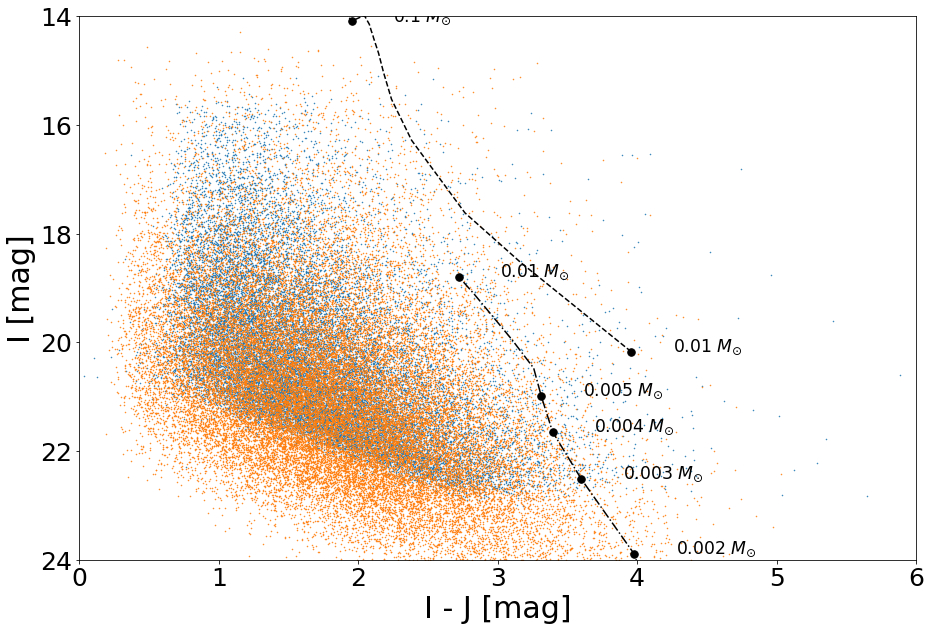

In [1]:
from scipy import interpolate
from astropy.io import ascii
from astropy.table import Table, vstack
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
import numpy as np

# Measures the magnitude offset due to the distance of the source with respect to us
# dist -- The distance to the object

dist = 150
DM = 5 * np.log10(dist) - 5

# Mass column from the BT-Settl models

bt_mass = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])

# I magnitudes from the BT-Settl models with the magnitude offset applied

bt_I = np.array([14.291, 12.655, 11.737, 10.403, 9.648, 9.158, 8.800, 8.519, 8.462, 8.391, 8.270, 8.105, 8.209, 7.183, 6.466, 5.937, 5.533, 5.211, 4.916, 4.646, 4.417, 4.212, 4.016, 3.838, 3.669, 3.495])
bt_I = bt_I + DM

# J magnitudes from the BT-Settl models with the magnitude offset applied

bt_J = np.array([10.334, 9.488, 8.972, 8.020, 7.409, 6.976, 6.654, 6.409, 6.358, 6.297, 6.190, 6.061, 6.256, 5.516, 5.006, 4.636, 4.336, 4.098, 3.868, 3.658, 3.479, 3.315, 3.156, 3.012, 2.873, 2.730])
bt_J = bt_J + DM

# K magnitudes from the BT-Settl models with the magnitude offset applied

bt_K = np.array([9.381, 8.662, 8.173, 7.250, 6.653, 6.228, 5.913, 5.673, 5.621, 5.559, 5.452, 5.319, 5.510, 4.723, 4.155, 3.739, 3.427, 3.196, 2.987, 2.815, 2.677, 2.552, 2.430, 2.319, 2.213, 2.099])
bt_K = bt_K + DM

# I - J color from the BT-Settl models

bt_color_I_J = bt_I - bt_J

# I - K color from the BT-Settl models

bt_color_I_K = bt_I - bt_K

# Mass column from the AMES-Dusty models

ames_mass = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.11, 0.13, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.57, 0.6, 0.62, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4])

# I magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_I = np.array([21.873, 19.972, 18.007, 16.633, 15.764, 15.106, 14.594, 14.079, 13.635, 13.237, 12.909, 12.427, 11.898, 11.219, 10.237, 9.510, 8.960, 8.742, 8.505, 8.467, 8.185, 8.333, 8.190, 7.767, 7.945, 7.734, 7.546, 7.331, 7.132, 6.765, 6.444, 6.183, 5.968, 5.786, 5.618, 5.407, 5.324, 5.277, 5.074, 4.971, 4.855, 4.751, 4.671, 4.543, 4.460, 4.361, 4.201, 4.110, 4.040, 3.885, 3.731])
ames_I = ames_I + DM
ames_I = ames_I[ames_mass <= 0.01]

# J magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_J = np.array([18.000, 15.728, 14.030, 13.034, 12.371, 11.794, 11.336, 10.974, 10.673, 10.404, 10.189, 9.874, 9.475, 8.965, 8.160, 7.584, 7.069, 6.893, 6.686, 6.654, 6.353, 6.544, 6.420, 5.974, 6.268, 6.081, 5.916, 5.720, 5.544, 5.226, 4.946, 4.716, 4.529, 4.370, 4.224, 4.040, 3.968, 3.930, 3.762, 3.679, 3.588, 3.509, 3.452, 3.346, 3.288, 3.211, 3.104, 3.057, 3.018, 2.910, 2.790])
ames_J = ames_J + DM
ames_J = ames_J[ames_mass <= 0.01]

# K magnitudes from the AMES-Dusty models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_K = np.array([18.861, 15.359, 13.282, 12.287, 11.597, 11.013, 10.551, 10.204, 9.920, 9.666, 9.462, 9.133, 8.752, 8.255, 7.467, 6.873, 6.368, 6.193, 5.989, 5.958, 5.663, 5.849, 5.723, 5.285, 5.564, 5.373, 5.204, 5.000, 4.814, 4.470, 4.164, 3.913, 3.710, 3.538, 3.381, 3.185, 3.108, 3.067, 2.888, 2.799, 2.705, 2.624, 2.565, 2.463, 2.410, 2.338, 2.249, 2.212, 2.178, 2.091, 1.998])
ames_K = ames_K + DM
ames_K = ames_K[ames_mass <= 0.01]

# Only retain the array elements pertaining to masses below 0.01 Solar-masses

ames_mass = ames_mass[ames_mass <= 0.01]

# I - J color from the AMES-Dusty models

ames_color_I_J = ames_I - ames_J

# I - K color from the AMES-Dusty models

ames_color_I_K = ames_I - ames_K

# Interpolates the BT-Settl model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_bt_I_J = interpolate.interp1d(bt_mass, bt_color_I_J, kind = 'linear')
color_model_bt_I_K = interpolate.interp1d(bt_mass, bt_color_I_K, kind = 'linear')
mag_model_bt = interpolate.interp1d(bt_mass, bt_I, kind = 'linear')

# Interpolates the AMES-Dusty model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

color_model_ames_I_J = interpolate.interp1d(ames_mass, ames_color_I_J, kind = 'linear')
color_model_ames_I_K = interpolate.interp1d(ames_mass, ames_color_I_K, kind = 'linear')
mag_model_ames = interpolate.interp1d(ames_mass, ames_I, kind = 'linear')

# Creates a continuous array connecting both models
# This is used to build an interpolation at the ends of both models

full_mass = np.hstack((ames_mass, bt_mass))
full_color_I_J = np.hstack((ames_color_I_J, bt_color_I_J))
full_color_I_K = np.hstack((ames_color_I_K, bt_color_I_K))
full_mag = np.hstack((ames_I, bt_I))

# Interpolates the mass values of both models with the respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

full_color_interp_I_J = interpolate.interp1d(full_mass, full_color_I_J)
full_color_interp_I_K = interpolate.interp1d(full_mass, full_color_I_K)
full_mag_interp = interpolate.interp1d(full_mass, full_mag)

# The mass values to be highlighted by the BT-Settl interpolation on the diagrams

m = np.array([0.01, 0.1, 0.2, 0.5, 1])

# The mass values to be highlighted by the AMES-Dusty interpolation on the diagrams

n = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1, 0.2, 0.5, 1])

# The minimum and maximum values present in the BT-Settl model mass array

min_mass_bt = np.amin(bt_mass)
max_mass_bt = np.amax(bt_mass)

# Only keep the values in the m-array which fall within the BT-Settl model mass array's limits

m = m[np.where(np.logical_and(m >= min_mass_bt, m <= max_mass_bt))]

# The minimum and maximum values present in the AMES-COND model mass array

min_mass_ames = np.amin(ames_mass)
max_mass_ames = np.amax(ames_mass)

# Only keep the values in the n-array which fall within the AMES-COND model mass array's limits

n = n[np.where(np.logical_and(n >= min_mass_ames, n <= max_mass_ames))]

wsi = ascii.read('/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_Aper_PSF.dat')
fs = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Selected_Faint_Sources.dat')
#model = ascii.read('/home/yobd/Documents/galaxy_model.dat')
model = ascii.read('/home/yobd/Documents/galaxy_model_ext_applied.dat')

model.remove_rows([model['I_EXT'] == 0])

#model.remove_rows([model['I'] < np.amin(wsi['I_MAG_SUBARU']) - 1])
#model.remove_rows([model['I'] > 23])
#model.remove_rows([model['I-J'] < np.amin(wsi['I_MAG_SUBARU'] - wsi['jAperMag3']) - 1])
#model.remove_rows([model['I-J'] > np.amax(wsi['I_MAG_SUBARU'] - wsi['jAperMag3']) + 1])

plt.rc('xtick',labelsize = 25)
plt.rc('ytick',labelsize = 25)

plt.figure(1, figsize = (15, 10))
plt.scatter(wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], marker = '.', s = 1)#, label = 'i-Band Sources')
plt.scatter(model['I-J_NEW'], model['I_NEW'], marker = '.', s = 1)
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES Dusty', color = 'k', linestyle = '-.')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.3, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.3, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
#plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xlim(0, 6)
plt.ylim(24, 14)
#plt.legend(fontsize = 'large', loc = 1)
plt.show()

[0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9
 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3 6.5 6.7]
[15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.  21.5
 22.  22.5 23. ]


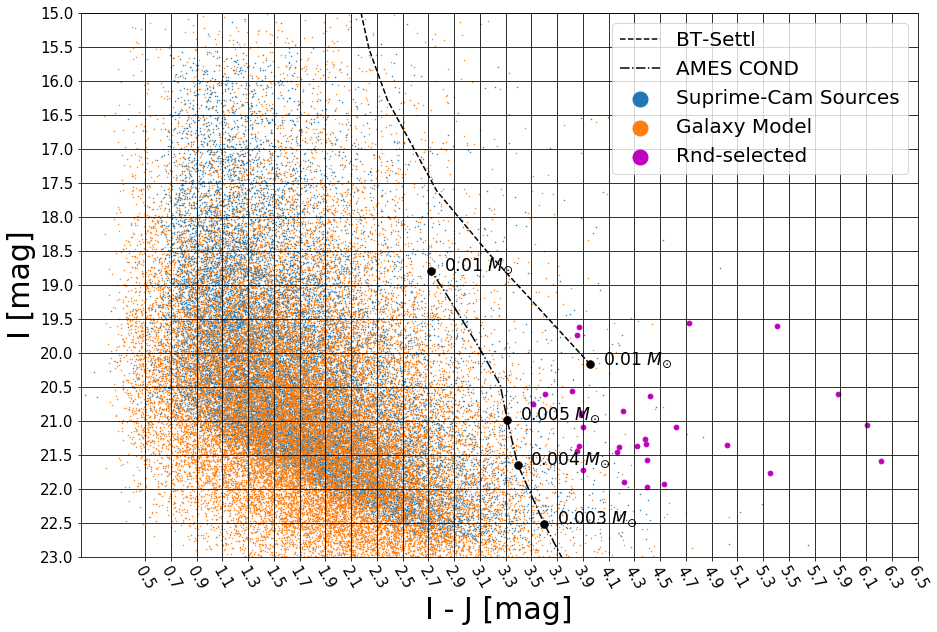

In [2]:
import random

def in_cell(catalog, xdata, ydata, xedges, yedges):
    new_catalog = Table.copy(catalog)
    new_xdata = np.copy(xdata)
    new_ydata = np.copy(ydata)
    
    new_catalog = new_catalog[new_xdata > xedges[0]]
    new_ydata = new_ydata[new_xdata > xedges[0]]
    new_xdata = new_xdata[new_xdata > xedges[0]]
    
    new_catalog = new_catalog[new_xdata < xedges[1]]
    new_ydata = new_ydata[new_xdata < xedges[1]]
    new_xdata = new_xdata[new_xdata < xedges[1]]
    
    new_catalog = new_catalog[new_ydata > yedges[0]]
    new_xdata = new_xdata[new_ydata > yedges[0]]
    new_ydata = new_ydata[new_ydata > yedges[0]]
    
    new_catalog = new_catalog[new_ydata < yedges[1]]
    new_xdata = new_xdata[new_ydata < yedges[1]]
    new_ydata = new_ydata[new_ydata < yedges[1]]
    
    return new_catalog

bin_edges_x = np.arange(0, 32) * 0.2 + 0.5
bin_edges_y = np.arange(0, 17) * 0.5 + 15.
print(bin_edges_x)
print(bin_edges_y)
#wsi_hist, wsi_x_edges, wsi_y_edges = np.histogram2d(wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], bins = [bin_edges_x, bin_edges_y])

i = 0
j = 0
wsi_selected = Table()

while i < len(bin_edges_y) - 1:
    while j < len(bin_edges_x) - 1:
        wsi_in_cell = in_cell(wsi, wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], bin_edges_x[j:j + 2], bin_edges_y[i:i + 2])
        model_in_cell = in_cell(model, model['I-J_NEW'], model['I_NEW'], bin_edges_x[j:j + 2], bin_edges_y[i:i + 2])
        if len(wsi_in_cell) > len(model_in_cell):
            idx = random.sample(range(0, len(wsi_in_cell)), len(model_in_cell))
            wsi_in_cell.remove_rows(idx)
            wsi_selected = vstack([wsi_selected, wsi_in_cell])
        j += 1
    j = 0
    i += 1

i = 0
j = 0
fs_selected = Table()

while i < len(bin_edges_y) - 1:
    while j < len(bin_edges_x) - 1:
        fs_in_cell = in_cell(fs, fs['I_MAG_SUBARU'] - fs['jAperMag3'], fs['I_MAG_SUBARU'], bin_edges_x[j:j + 2], bin_edges_y[i:i + 2])
        model_in_cell = in_cell(model, model['I-J_NEW'], model['I_NEW'], bin_edges_x[j:j + 2], bin_edges_y[i:i + 2])
        if len(fs_in_cell) > len(model_in_cell):
            idx = random.sample(range(0, len(fs_in_cell)), len(model_in_cell))
            fs_in_cell.remove_rows(idx)
            fs_selected = vstack([fs_selected, fs_in_cell])
        j += 1
    j = 0
    i += 1

plt.rc('xtick',labelsize = 15)
plt.rc('ytick',labelsize = 15)

plt.figure(1, figsize = (15, 10))
plt.scatter(wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], marker = '.', s = 1, label = 'Suprime-Cam Sources')
plt.scatter(model['I-J_NEW'], model['I_NEW'], marker = '.', s = 1, label = 'Galaxy Model')
#plt.scatter(wsi_selected['I_MAG_SUBARU'] - wsi_selected['jAperMag3'], wsi_selected['I_MAG_SUBARU'], marker = '.', s = 5, color = 'r')
plt.scatter(fs_selected['I_MAG_SUBARU'] - fs_selected['jAperMag3'], fs_selected['I_MAG_SUBARU'], marker = '.', s = 90, color = 'm', label = 'Rnd-selected')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES COND', color = 'k', linestyle = '-.')
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.1, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.1, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
#plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
plt.xticks(np.arange(min(bin_edges_x), max(bin_edges_x) + 1, 0.2), rotation = (-60))
plt.yticks(np.arange(min(bin_edges_y), max(bin_edges_y) + 1, 0.5))
plt.grid(color = 'k')
#plt.axes.Axes.set_xticklabels(rotation = (45))
lgnd = plt.legend(fontsize = 20)
lgnd.legendHandles[2]._sizes = [900]
lgnd.legendHandles[3]._sizes = [900]
lgnd.legendHandles[4]._sizes = [900]
plt.xlim(0, 6.5)
plt.ylim(23, 15)
plt.show()

ascii.write(fs_selected, '/home/yobd/Documents/Selection/rnd_selected.dat', format = 'csv', overwrite = True)

The percentage of sources which should constitute members is 100.0 %!


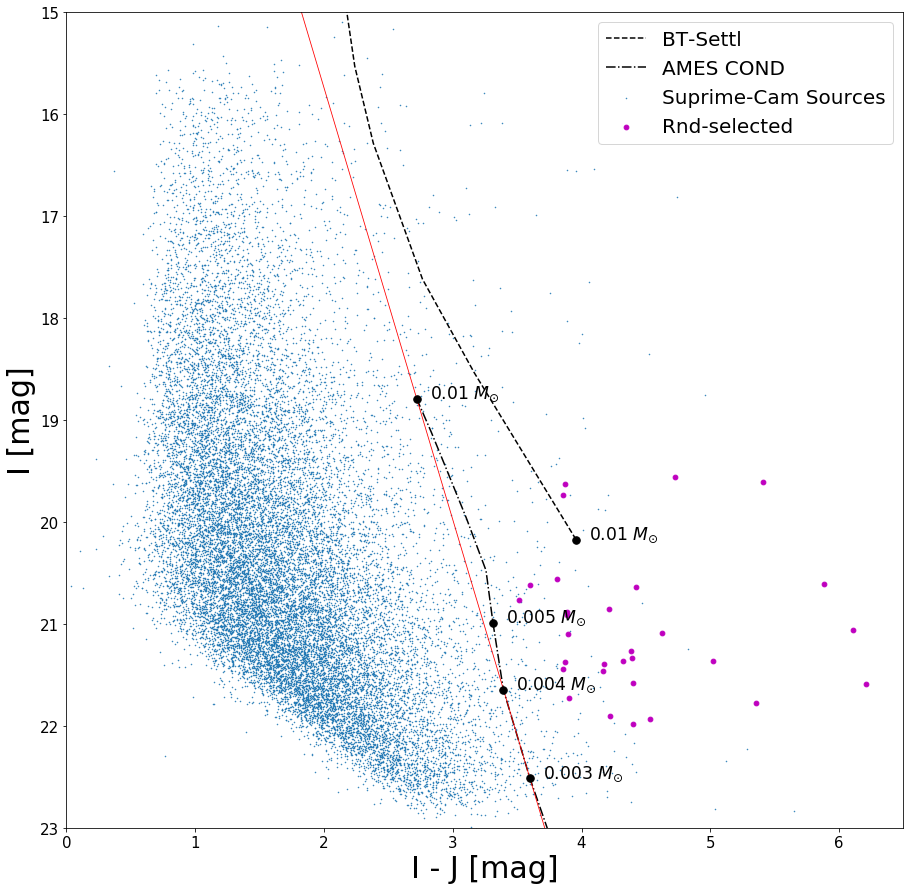

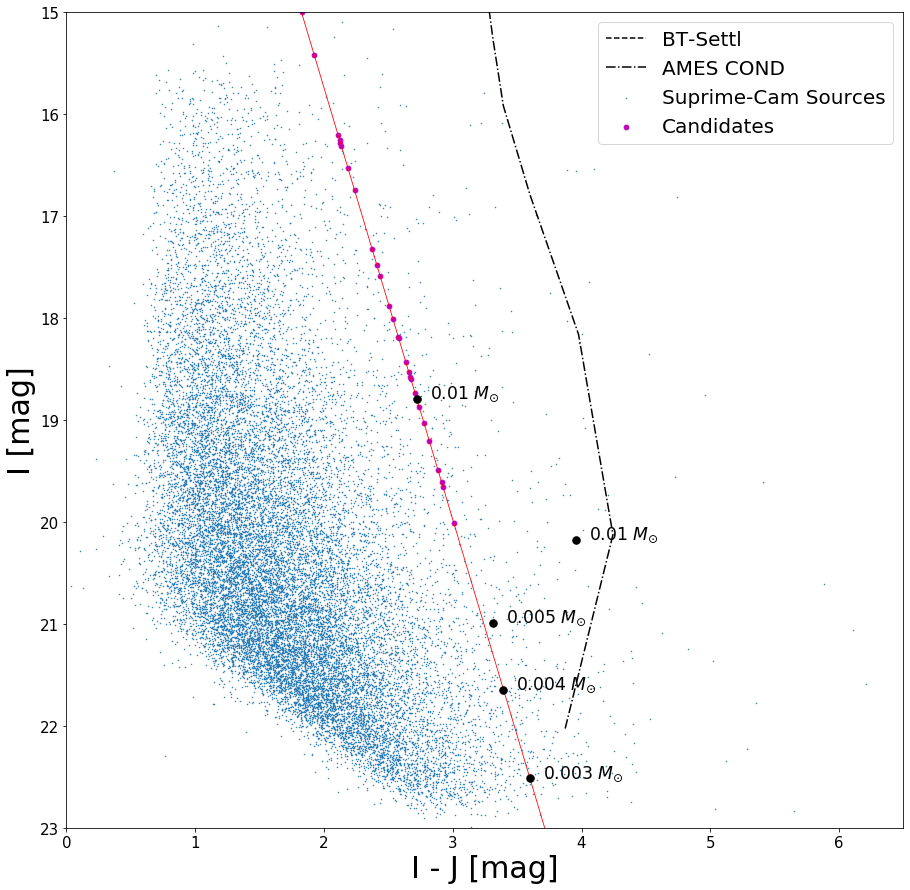

In [37]:
pfm = 100 * len(fs_selected) / len(fs)

print("The percentage of sources which should constitute members is", pfm, "%!")

import numpy as np
from scipy import interpolate
from scipy.optimize import fsolve
from astropy.io import ascii
from astropy.table import setdiff, Table, unique, vstack
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
%run Crossmatch.ipynb
%run ext_lambda.ipynb
%run Utility.ipynb
# Measures the magnitude offset due to the distance of the source with respect to us
# dist -- The distance to the object

dist = 150
DM = 5 * np.log10(dist) - 5

# Mass column from the BT-Settl models

bt_mass = np.array([0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4])

# I magnitudes from the BT-Settl models with the magnitude offset applied

bt_I_orig = np.array([14.291, 12.655, 11.737, 10.403, 9.648, 9.158, 8.800, 8.519, 8.462, 8.391, 8.270, 8.105, 8.209, 7.183, 6.466, 5.937, 5.533, 5.211, 4.916, 4.646, 4.417, 4.212, 4.016, 3.838, 3.669, 3.495])
bt_I = bt_I_orig + DM

# J magnitudes from the BT-Settl models with the magnitude offset applied

bt_J_orig = np.array([10.334, 9.488, 8.972, 8.020, 7.409, 6.976, 6.654, 6.409, 6.358, 6.297, 6.190, 6.061, 6.256, 5.516, 5.006, 4.636, 4.336, 4.098, 3.868, 3.658, 3.479, 3.315, 3.156, 3.012, 2.873, 2.730])
bt_J = bt_J_orig + DM

# K magnitudes from the BT-Settl models with the magnitude offset applied

bt_K_orig = np.array([9.381, 8.662, 8.173, 7.250, 6.653, 6.228, 5.913, 5.673, 5.621, 5.559, 5.452, 5.319, 5.510, 4.723, 4.155, 3.739, 3.427, 3.196, 2.987, 2.815, 2.677, 2.552, 2.430, 2.319, 2.213, 2.099])
bt_K = bt_K_orig + DM

# I - J color from the BT-Settl models

bt_color_I_J = bt_I - bt_J

# I - K color from the BT-Settl models

bt_color_I_K = bt_I - bt_K

# Mass column from the AMES-COND models

ames_mass_orig = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.012, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.072, 0.075, 0.08, 0.09, 0.1, 0.11, 0.13, 0.15, 0.175, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.57, 0.6, 0.62, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15, 1.2, 1.3, 1.4])

# I magnitudes from the AMES-COND models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_I_orig = np.array([21.873, 19.972, 18.007, 16.633, 15.764, 15.106, 14.594, 14.079, 13.635, 13.237, 12.909, 12.427, 11.898, 11.219, 10.237, 9.510, 8.960, 8.742, 8.505, 8.467, 8.185, 8.333, 8.190, 7.767, 7.945, 7.734, 7.546, 7.331, 7.132, 6.765, 6.444, 6.183, 5.968, 5.786, 5.618, 5.407, 5.324, 5.277, 5.074, 4.971, 4.855, 4.751, 4.671, 4.543, 4.460, 4.361, 4.201, 4.110, 4.040, 3.885, 3.731])
ames_I = ames_I_orig + DM
ames_I = ames_I[ames_mass_orig <= 0.01]

# J magnitudes from the AMES-COND models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_J_orig = np.array([18.000, 15.728, 14.030, 13.034, 12.371, 11.794, 11.336, 10.974, 10.673, 10.404, 10.189, 9.874, 9.475, 8.965, 8.160, 7.584, 7.069, 6.893, 6.686, 6.654, 6.353, 6.544, 6.420, 5.974, 6.268, 6.081, 5.916, 5.720, 5.544, 5.226, 4.946, 4.716, 4.529, 4.370, 4.224, 4.040, 3.968, 3.930, 3.762, 3.679, 3.588, 3.509, 3.452, 3.346, 3.288, 3.211, 3.104, 3.057, 3.018, 2.910, 2.790])
ames_J = ames_J_orig + DM
ames_J = ames_J[ames_mass_orig <= 0.01]

# K magnitudes from the AMES-COND models with the magnitude offset applied and with values corresponding to a mass bigger than 0.01 Solar-masses cut out from the array

ames_K_orig = np.array([18.861, 15.359, 13.282, 12.287, 11.597, 11.013, 10.551, 10.204, 9.920, 9.666, 9.462, 9.133, 8.752, 8.255, 7.467, 6.873, 6.368, 6.193, 5.989, 5.958, 5.663, 5.849, 5.723, 5.285, 5.564, 5.373, 5.204, 5.000, 4.814, 4.470, 4.164, 3.913, 3.710, 3.538, 3.381, 3.185, 3.108, 3.067, 2.888, 2.799, 2.705, 2.624, 2.565, 2.463, 2.410, 2.338, 2.249, 2.212, 2.178, 2.091, 1.998])
ames_K = ames_K_orig + DM
ames_K = ames_K[ames_mass_orig <= 0.01]

# Only retain the array elements pertaining to masses below 0.01 Solar-masses

ames_mass = ames_mass_orig[ames_mass_orig <= 0.01]

# Interpolates the BT-Settl model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are

interp_bt_I = interpolate.interp1d(bt_I, bt_mass, kind = 'linear')
interp_bt_J = interpolate.interp1d(bt_J, bt_mass, kind = 'linear')
interp_bt_K = interpolate.interp1d(bt_K, bt_mass, kind = 'linear')

# Interpolates the AMES-COND model mass values with its respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are
interp_ames_I = interpolate.interp1d(ames_I, ames_mass, kind = 'linear')
interp_ames_J = interpolate.interp1d(ames_J, ames_mass, kind = 'linear')
interp_ames_K = interpolate.interp1d(ames_K, ames_mass, kind = 'linear')

# Creates a continuous array connecting both models
# This is used to build an interpolation at the ends of both models
full_mass = np.hstack((ames_mass, bt_mass))
full_interp_I = np.hstack((ames_I, bt_I))
full_interp_J = np.hstack((ames_J, bt_J))
full_interp_K = np.hstack((ames_K, bt_K))

# Interpolates the mass values of both models with the respective color arrays defined above
# This is used later on the figures to plot the points in the diagram where the respective mass thresholds are
full_interp_I = interpolate.interp1d(full_interp_I, full_mass)
full_interp_J = interpolate.interp1d(full_interp_J, full_mass)
full_interp_K = interpolate.interp1d(full_interp_K, full_mass)

# The mass values to be highlighted by the BT-Settl interpolation on the diagrams

m = np.array([0.01, 0.1, 0.2, 0.5, 1])

# The mass values to be highlighted by the AMES-COND interpolation on the diagrams

n = np.array([0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.1, 0.2, 0.5, 1])

# The minimum and maximum values present in the BT-Settl model mass array

min_mass_bt = np.amin(bt_mass)
max_mass_bt = np.amax(bt_mass)

# Only keep the values in the m-array which fall within the BT-Settl model mass array's limits

m = m[np.where(np.logical_and(m >= min_mass_bt, m <= max_mass_bt))]

# The minimum and maximum values present in the AMES-COND model mass array

min_mass_ames = np.amin(ames_mass)
max_mass_ames = np.amax(ames_mass)

# Only keep the values in the n-array which fall within the AMES-COND model mass array's limits

n = n[np.where(np.logical_and(n >= min_mass_ames, n <= max_mass_ames))]

wsi = ascii.read('/home/yobd/Documents/Photometry_Output/Full_Catalog_ZP_CT_Aper_PSF.dat')

fs_selected = ascii.read('/home/yobd/Documents/Selection/rnd_selected.dat')

ext_estimated = ascii.read('/home/yobd/Documents/WSI_extinction_estimated.dat')

fs_no_extinction = setdiff(fs_selected, ext_estimated, keys = ['ra', 'dec'])

temp_cat = setdiff(ext_estimated, fs_selected, keys = ['ra', 'dec'])

fs_extinction = setdiff(ext_estimated, temp_cat, keys = ['ra', 'dec'])

fs_no_extinction_I_J = fs_no_extinction['I_MAG_SUBARU'] - fs_no_extinction['jAperMag3']

gaia_selected = ascii.read('/home/yobd/Documents/Selection/W-S-I+_Selected_Sources_CMD_PLX_PM.dat')

gaia_selected_no_extinction = setdiff(gaia_selected, ext_estimated, keys = ['ra', 'dec'])

temp_cat = setdiff(ext_estimated, gaia_selected, keys = ['ra', 'dec'])

gaia_selected_extinction = setdiff(ext_estimated, temp_cat, keys = ['ra', 'dec'])

# The reference wavelength for the DENIS I-band

#i_lam = 7897.12 # Reference
i_lam = 7862.10 # Effective

# The reference wavelength for the H-Alpha filter

h_alpha_lam = 6566.81

# The reference wavelength for the VHS J-band

#j_lam = 12540.9 # Reference
j_lam = 12481.00 # Effective

# The reference wavelength for the VHS K-band

#k_lam = 21487.7
k_lam = 21435.46

rv = 5

x_ext_0 = 0

y_ext_0 = 0

x_ext_1 = x_ext_0 + ext_lambda(i_lam, 1, rv) - ext_lambda(j_lam, 1, rv)

y_ext_1 = y_ext_0 + ext_lambda(i_lam, 1, rv)

# The module of the above line corresponds to one unity of extinction

one_mag = np.sqrt( ( (x_ext_0 - x_ext_1) ** 2) + ( (y_ext_0 - y_ext_1) ** 2) )

a_ext, b_ext, c_ext = get_line_eq(x_ext_0, x_ext_1, y_ext_0, y_ext_1)

a_3, b_3, c_3 = get_line_eq(ames_I[np.where(ames_mass == 0.01)[0][0]] - ames_J[np.where(ames_mass == 0.01)[0][0]], ames_I[np.where(ames_mass == 0.003)[0][0]] - ames_J[np.where(ames_mass == 0.003)[0][0]], ames_I[np.where(ames_mass == 0.01)[0][0]], ames_I[np.where(ames_mass == 0.003)[0][0]])

x = np.linspace(-1, 8, 9000)

plt.figure(1, figsize = (15, 15))
plt.scatter(wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], marker = '.', s = 1, label = 'Suprime-Cam Sources')
plt.scatter(fs_selected['I_MAG_SUBARU'] - fs_selected['jAperMag3'], fs_selected['I_MAG_SUBARU'], marker = '.', s = 90, color = 'm', label = 'Rnd-selected')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES COND', color = 'k', linestyle = '-.')
plt.plot(x, (- c_3 - a_3 * x) / b_3, color = 'r', linewidth = 0.8)
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.1, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.1, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
#plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
#plt.axes.Axes.set_xticklabels(rotation = (45))
lgnd = plt.legend(fontsize = 20)
lgnd.legendHandles[0]._sizes = [900]
lgnd.legendHandles[1]._sizes = [900]
plt.xlim(0, 6.5)
plt.ylim(23, 15)
plt.show()

extinctions_i = np.zeros(len(fs_no_extinction), dtype = np.float64)

extinctions_j = np.zeros(len(fs_no_extinction), dtype = np.float64)

extinctions_k = np.zeros(len(fs_no_extinction), dtype = np.float64)

i = 0

while i < len(fs_no_extinction):
    
    # y[0] is the reddening extinction line which passes on the item's coordinates
    # y[1] is the model line
    # The function will calculate the interception of these lines (this interception will be the point the item's coords should be if it had not been reddened)
    
    def f(x):
        y = np.zeros(2)
        y[0] = a_ext * (x[0] - fs_no_extinction_I_J[i]) + b_ext * (x[1] - fs_no_extinction['I_MAG_SUBARU'][i]) + c_ext
        y[1] = a_3 * x[0] + b_3 * x[1] + c_3
        return y
    
    # x0 is needed just as an input for the FSOLVE function
    
    x0 = np.array([0, 0])
    
    # Retrieves two values:
    # solution[0] - The xx coordinate of the interception point
    # solution[1] - The yy coordinate of the interception point
    
    solution = fsolve(f, x0)
    
    # The extinction magnitude of the current item (in the visible)
    
    av_mag = np.sqrt( ( (solution[0] - fs_no_extinction_I_J[i]) ** 2) + ( (solution[1] - fs_no_extinction['I_MAG_SUBARU'][i]) ** 2) ) / one_mag
    
    # The bolometric extinction magnitude of the current item
    
    extinctions_i[i] = ext_lambda(i_lam, av_mag, rv)
    
    extinctions_j[i] = ext_lambda(j_lam, av_mag, rv)
    
    extinctions_k[i] = ext_lambda(k_lam, av_mag, rv)
    
    # Iteration of the cycle
    
    i = i + 1

fs_no_extinction['I_MAG_SUBARU_NEW'] = fs_no_extinction['I_MAG_SUBARU'] - extinctions_i

fs_no_extinction['jAperMag3_NEW'] = fs_no_extinction['jAperMag3'] - extinctions_j

fs_no_extinction['ksAperMag3_NEW'] = fs_no_extinction['ksAperMag3'] - extinctions_k

fs_no_extinction['I_EXT'] = 0.0

fs_no_extinction['I_EXT'] = extinctions_i

fs_no_extinction['J_EXT'] = 0.0

fs_no_extinction['J_EXT'] = extinctions_j

fs_no_extinction['K_EXT'] = 0.0

fs_no_extinction['K_EXT'] = extinctions_k

extinctions_i = np.zeros(len(gaia_selected_no_extinction), dtype = np.float64)

extinctions_j = np.zeros(len(gaia_selected_no_extinction), dtype = np.float64)

extinctions_k = np.zeros(len(gaia_selected_no_extinction), dtype = np.float64)

gaia_selected_no_extinction_I_J = gaia_selected_no_extinction['I_MAG_SUBARU'] - gaia_selected_no_extinction['jAperMag3']

i = 0

while i < len(gaia_selected_no_extinction):
    
    # y[0] is the reddening extinction line which passes on the item's coordinates
    # y[1] is the model line
    # The function will calculate the interception of these lines (this interception will be the point the item's coords should be if it had not been reddened)
    
    def f(x):
        y = np.zeros(2)
        y[0] = a_ext * (x[0] - gaia_selected_no_extinction_I_J[i]) + b_ext * (x[1] - gaia_selected_no_extinction['I_MAG_SUBARU'][i]) + c_ext
        y[1] = a_3 * x[0] + b_3 * x[1] + c_3
        return y
    
    # x0 is needed just as an input for the FSOLVE function
    
    x0 = np.array([0, 0])
    
    # Retrieves two values:
    # solution[0] - The xx coordinate of the interception point
    # solution[1] - The yy coordinate of the interception point
    
    solution = fsolve(f, x0)
    
    # The extinction magnitude of the current item (in the visible)
    
    av_mag = np.sqrt( ( (solution[0] - gaia_selected_no_extinction_I_J[i]) ** 2) + ( (solution[1] - gaia_selected_no_extinction['I_MAG_SUBARU'][i]) ** 2) ) / one_mag
    
    # The bolometric extinction magnitude of the current item
    
    extinctions_i[i] = ext_lambda(i_lam, av_mag, rv)
    
    extinctions_j[i] = ext_lambda(j_lam, av_mag, rv)
    
    extinctions_k[i] = ext_lambda(k_lam, av_mag, rv)
    
    # Iteration of the cycle
    
    i = i + 1

gaia_selected_no_extinction['I_MAG_SUBARU_NEW'] = gaia_selected_no_extinction['I_MAG_SUBARU'] - extinctions_i

gaia_selected_no_extinction['jAperMag3_NEW'] = gaia_selected_no_extinction['jAperMag3'] - extinctions_j

gaia_selected_no_extinction['ksAperMag3_NEW'] = gaia_selected_no_extinction['ksAperMag3'] - extinctions_k

gaia_selected_no_extinction['I_EXT'] = 0.0

gaia_selected_no_extinction['I_EXT'] = extinctions_i

gaia_selected_no_extinction['J_EXT'] = 0.0

gaia_selected_no_extinction['J_EXT'] = extinctions_j

gaia_selected_no_extinction['K_EXT'] = 0.0

gaia_selected_no_extinction['K_EXT'] = extinctions_k

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'I_MAG_SUBARU', 'I_MAG_SUBARU_NEW', 'I_MAG_SUBARU_ERR', 'I_FLUX_SUBARU', 'I_FLUX_SUBARU_ERR', 'I_FLUX_RADIUS_SUBARU', 'I_SNR_WIN_SUBARU', 'jAperMag3', 'jAperMag3_NEW', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3_NEW', 'ksAperMag3Err', 'I_EXT', 'J_EXT', 'K_EXT']

# Remakes the catalog preserving only the columns in the above list
fs_extinction = make_catalog(fs_extinction, columns)
fs_no_extinction = make_catalog(fs_no_extinction, columns)

fs = vstack([fs_extinction, fs_no_extinction])

fs['I_Mass'] = 0.
fs['J_Mass'] = 0.
fs['K_Mass'] = 0.
fs['Distance'] = 150.0

# Remakes the catalog preserving only the columns in the above list
gaia_selected_extinction = make_catalog(gaia_selected_extinction, columns)
gaia_selected_no_extinction = make_catalog(gaia_selected_no_extinction, columns)

gaia_selected_temp = vstack([gaia_selected_extinction, gaia_selected_no_extinction])

gaia = ascii.read('/home/yobd/Documents/CatalogsCrA/New_Run/Gaia_DR3.dat')

gaia_selected = cross_match(gaia_selected_temp, 'ra', 'dec', gaia, 'RA_ICRS', 'DE_ICRS', 1, sep = True)

gaia_selected = reset_main_catalog_columns(gaia_selected_temp, gaia_selected)

gaia_selected.sort('d2d')

# Removes the duplicate entries from the cross-matched catalog
gaia_selected = unique(gaia_selected, keys = ['RA_ICRS', 'DE_ICRS'], keep = 'first', silent = True)

gaia_selected['I_Mass'] = 0.
gaia_selected['J_Mass'] = 0.
gaia_selected['K_Mass'] = 0.
gaia_selected['Distance'] = 1 / gaia_selected['Plx']

i = 0

while i < len(fs):
    
    try:
        
        fs['I_Mass'][i] = fs['I_Mass'][i] + interp_ames_I(fs['I_MAG_SUBARU_NEW'][i])
    
    except ValueError:
        
        fs['I_Mass'][i] = interp_bt_I(fs['I_MAG_SUBARU_NEW'][i])
    
    try:
        
        fs['J_Mass'][i] = interp_ames_J(fs['jAperMag3_NEW'][i])
    
    except ValueError:
        
        fs['J_Mass'][i] = interp_bt_J(fs['jAperMag3_NEW'][i])
    
    try:
        
        fs['K_Mass'][i] = interp_ames_K(fs['ksAperMag3_NEW'][i])
    
    except ValueError:
        
        fs['K_Mass'][i] = interp_bt_K(fs['ksAperMag3_NEW'][i])
    
    i += 1

i = 0

while i < len(gaia_selected):
    
    bt_I = bt_I_orig + gaia_selected['Distance'][i]
    bt_J = bt_J_orig + gaia_selected['Distance'][i]
    bt_K = bt_K_orig + gaia_selected['Distance'][i]
    ames_I = ames_I_orig + gaia_selected['Distance'][i]
    ames_J = ames_J_orig + gaia_selected['Distance'][i]
    ames_K = ames_K_orig + gaia_selected['Distance'][i]
    ames_I = ames_I[ames_mass_orig <= 0.01]
    ames_J = ames_J[ames_mass_orig <= 0.01]
    ames_K = ames_K[ames_mass_orig <= 0.01]
    
    # Interpolates the BT-Settl model mass values with its respective color arrays defined above
    # This is used later on the figures to plot the points in the diagram where the respective mass thresholds are
    interp_bt_I = interpolate.interp1d(bt_I, bt_mass, kind = 'linear')
    interp_bt_J = interpolate.interp1d(bt_J, bt_mass, kind = 'linear')
    interp_bt_K = interpolate.interp1d(bt_K, bt_mass, kind = 'linear')
    
    # Interpolates the AMES-COND model mass values with its respective color arrays defined above
    # This is used later on the figures to plot the points in the diagram where the respective mass thresholds are
    interp_ames_I = interpolate.interp1d(ames_I, ames_mass, kind = 'linear')
    interp_ames_J = interpolate.interp1d(ames_J, ames_mass, kind = 'linear')
    interp_ames_K = interpolate.interp1d(ames_K, ames_mass, kind = 'linear')
    
    # Creates a continuous array connecting both models
    # This is used to build an interpolation at the ends of both models
    full_mass = np.hstack((ames_mass, bt_mass))
    full_interp_I = np.hstack((ames_I, bt_I))
    full_interp_J = np.hstack((ames_J, bt_J))
    full_interp_K = np.hstack((ames_K, bt_K))
    
    # Interpolates the mass values of both models with the respective color arrays defined above
    # This is used later on the figures to plot the points in the diagram where the respective mass thresholds are
    full_interp_I = interpolate.interp1d(full_interp_I, full_mass)
    full_interp_J = interpolate.interp1d(full_interp_J, full_mass)
    full_interp_K = interpolate.interp1d(full_interp_K, full_mass)
    
    try:
        
        gaia_selected['I_Mass'][i] = interp_ames_I(gaia_selected['I_MAG_SUBARU_NEW'][i])
    
    except ValueError:
        
        gaia_selected['I_Mass'][i] = interp_bt_I(gaia_selected['I_MAG_SUBARU_NEW'][i])
    
    try:
        
        gaia_selected['J_Mass'][i] = interp_ames_J(gaia_selected['jAperMag3_NEW'][i])
    
    except ValueError:
        
        gaia_selected['J_Mass'][i] = interp_bt_J(gaia_selected['jAperMag3_NEW'][i])
    
    try:
        
        gaia_selected['K_Mass'][i] = interp_ames_K(gaia_selected['ksAperMag3_NEW'][i])
    
    except ValueError:
        
        gaia_selected['K_Mass'][i] = interp_bt_K(gaia_selected['ksAperMag3_NEW'][i])
    
    i += 1

# The catalog columns which will be saved to the .csv file
columns = ['ra', 'dec', 'ELLIPTICITY', 'ELONGATION', 'I_MAG_SUBARU', 'I_MAG_SUBARU_NEW', 'I_MAG_SUBARU_ERR', 'I_FLUX_SUBARU', 'I_FLUX_SUBARU_ERR', 'I_FLUX_RADIUS_SUBARU', 'I_SNR_WIN_SUBARU', 'jAperMag3', 'jAperMag3_NEW', 'jAperMag3Err', 'ksAperMag3', 'ksAperMag3_NEW', 'ksAperMag3Err', 'I_EXT', 'J_EXT', 'K_EXT', 'Distance', 'I_Mass', 'J_Mass', 'K_Mass']

# Remakes the catalog preserving only the columns in the above list
gaia_selected = make_catalog(gaia_selected, columns)

candidates = vstack([fs, gaia_selected])

plt.figure(1, figsize = (15, 15))
plt.scatter(wsi['I_MAG_SUBARU'] - wsi['jAperMag3'], wsi['I_MAG_SUBARU'], marker = '.', s = 1, label = 'Suprime-Cam Sources')
plt.scatter(candidates['I_MAG_SUBARU_NEW'] - candidates['jAperMag3_NEW'], candidates['I_MAG_SUBARU_NEW'], marker = '.', s = 90, color = 'm', label = 'Candidates')
plt.plot(bt_color_I_J, bt_I, label = 'BT-Settl', color = 'k', linestyle = '--')
plt.plot(ames_color_I_J, ames_I, label = 'AMES COND', color = 'k', linestyle = '-.')
plt.plot(x, (- c_3 - a_3 * x) / b_3, color = 'r', linewidth = 0.8)
plt.plot(color_model_bt_I_J(m), mag_model_bt(m), '.', markersize = 15, color = 'k')
for m1 in m: plt.text(color_model_bt_I_J(m1) + 0.1, mag_model_bt(m1), str(m1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
plt.plot(color_model_ames_I_J(n), mag_model_ames(n), '.', markersize = 15, color = 'k')
for n1 in n: plt.text(color_model_ames_I_J(n1) + 0.1, mag_model_ames(n1), str(n1) + ' $M_{\odot}$', clip_on = True, fontsize = 'xx-large')
#plt.arrow(5, 14, x_ext_0 - x_ext_1, y_ext_0 - y_ext_1, head_width = 0.1, color = 'k')
plt.xlabel('I - J [mag]', fontsize = 30)
plt.ylabel('I [mag]', fontsize = 30)
plt.gca().invert_yaxis()
#plt.axes.Axes.set_xticklabels(rotation = (45))
lgnd = plt.legend(fontsize = 20)
lgnd.legendHandles[0]._sizes = [900]
lgnd.legendHandles[1]._sizes = [900]
plt.xlim(0, 6.5)
plt.ylim(23, 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


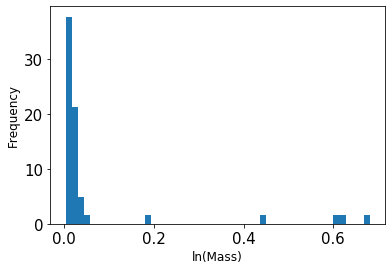

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


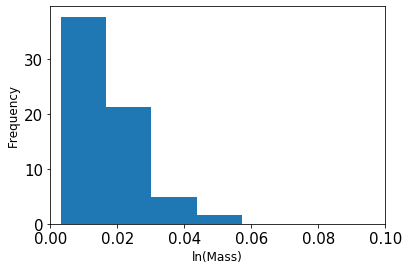

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


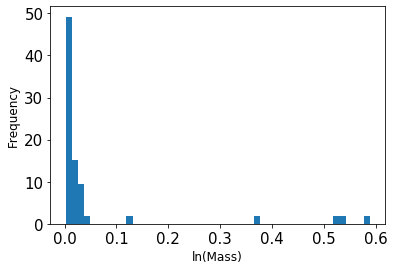

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


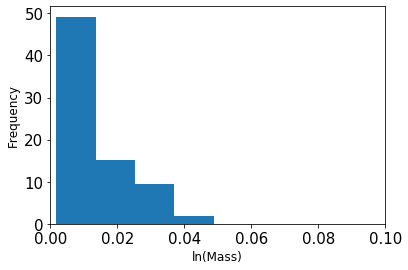

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


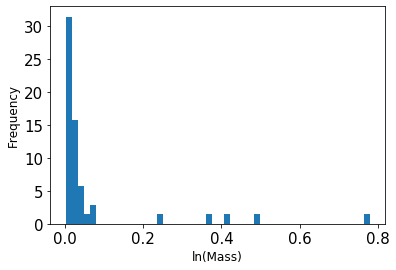

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


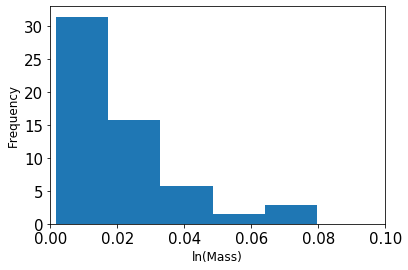

In [36]:
plt.figure(1)
n, bins, p = plt.hist(candidates['I_Mass'], 50, normed = 1)
#plt.yscale('log')
plt.xlabel("ln(Mass)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

plt.figure(2)
n, bins, p = plt.hist(candidates['I_Mass'], 50, normed = 1)
#plt.yscale('log')
plt.xlabel("ln(Mass)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.xlim(0, 0.1)
plt.show()

plt.figure(3)
n, bins, p = plt.hist(candidates['J_Mass'], 50, normed = 1)
#plt.yscale('log')
plt.xlabel("ln(Mass)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

plt.figure(4)
n, bins, p = plt.hist(candidates['J_Mass'], 50, normed = 1)
#plt.yscale('log')
plt.xlabel("ln(Mass)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.xlim(0, 0.1)
plt.show()

plt.figure(5)
n, bins, p = plt.hist(candidates['K_Mass'], 50, normed = 1)
#plt.yscale('log')
plt.xlabel("ln(Mass)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.show()

plt.figure(6)
n, bins, p = plt.hist(candidates['K_Mass'], 50, normed = 1)
#plt.yscale('log')
plt.xlabel("ln(Mass)", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.xlim(0, 0.1)
plt.show()